# **Project: Breast Cancer Diagnosis using Machine Learning**

**Date:** February 2026


## 1. Project Overview

Breast cancer is the most common cancer among women worldwide. Early diagnosis is critical for survival. This project aims to build a machine learning model capable of classifying breast masses as **Benign (non-cancerous)** or **Malignant (cancerous)** based on digital pathological data.


## 2. Objectives

* **Primary Goal:** Develop a predictive model to classify breast cancer cases with high accuracy.
* **Clinical Focus:** Prioritize **Recall (Sensitivity)** over Precision. In oncology, a False Negative (missing a cancer case) is much worse than a False Positive (a false alarm).
* **Explainability:** Analyze which cell features (e.g., Radius, Texture, Concavity) are the strongest indicators of malignancy.


## 3. The Dataset

* **Source:** Wisconsin Breast Cancer Diagnostic Dataset (WBCD).
* **Data Type:** Features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
* **Features:** 30 real-valued vector features (e.g., radius, texture, area) describing the cell nuclei.


## 4. Setting Up the Environment

We will start by importing the necessary libraries for data manipulation, visualization, and statistical analysis.
* **Pandas/NumPy:** For data handling and linear algebra.
* **Seaborn/Matplotlib:** For visualization (EDA).


In [1]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration for clearer visualization
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None) # To show all 33 columns

print("Libraries Imported Successfully")

Libraries Imported Successfully


## 5. Data Loading and Detailed Inspection

We will load the dataset and perform a comprehensive audit to understand its quality and structure. This process includes:
* **Visual Inspection:** Viewing the first few rows to understand the data format.
* **Shape Analysis:** Confirming the volume of data (number of patients vs. features).
* **Missing Values Audit:** Explicitly checking for null values in every column to identify incomplete data.
* **Duplicate Check:** Ensuring no patient data is repeated, which could bias the model.
* **Statistical Summary:** Reviewing the mean, standard deviation, and ranges to spot potential outliers or scaling issues.


In [ ]:
# 1. Load the dataset
df = pd.read_csv('data.csv')

# 2. Visual Inspection (Head)
print("--- First 5 Rows of Data ---")
display(df.head())

# 3. Shape Analysis
print("\n--- Dataset Dimensions ---")
print(f"Patients (Rows): {df.shape[0]}")
print(f"Features (Columns): {df.shape[1]}")

# 4. Missing Values Audit
print("\n--- Missing Values Check ---")
null_counts = df.isnull().sum()
# This will only print columns that actually have missing values (to keep output clean)
if null_counts.sum() > 0:
    print(null_counts[null_counts > 0])
else:
    print("No missing values found in the dataset.")

# 5. Data Info (Data Types)
print("\n--- Data Structure ---")
df.info()

# 6. Duplicate Check
duplicates = df.duplicated().sum()
print("\n--- Duplicate Check ---")
print(f"Number of duplicate rows: {duplicates}")

# 7. Statistical Summary
print("\n--- Statistical Summary ---")
display(df.describe().T)

--- First 5 Rows of Data ---


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



--- Dataset Dimensions ---
Patients (Rows): 569
Features (Columns): 33

--- Missing Values Check ---
Unnamed: 32    569
dtype: int64

--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 n

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## 6. Data Cleaning & Preprocessing

Based on our inspection, we will now clean the dataset to prepare it for analysis.
1.  **Drop `id`:** This column is a unique identifier for each patient. It contains no biological information and would confuse the model if left in.
2.  **Drop `Unnamed: 32`:** This column was identified as containing 100% missing values (NaN), likely a formatting artifact.
3.  **Encode Target Variable (`diagnosis`):**
    * The dataset currently uses "M" for Malignant and "B" for Benign.
    * We will convert this to binary: **1 = Malignant (Positive)** and **0 = Benign (Negative)**.
    * *Note: In medical AI, we typically assign '1' to the condition we are trying to detect.*


In [3]:
# --- BLOCK 4: DATA CLEANING ---

# 1. Droping the unneeded columns
# errors='ignore' ensures the code doesn't crash if we run it twice
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# 2. Encoding Diagnosis
# M (Malignant) -> 1
# B (Benign)    -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. Verification
print("Cleaning Complete.")
print(f"New Shape: {df.shape}")

# Show the new 'diagnosis' numbers to prove it worked
print("\n--- New Class Distribution ---")
print(df['diagnosis'].value_counts())

# viewing the clean dataset
df.head()

Cleaning Complete.
New Shape: (569, 31)

--- New Class Distribution ---
diagnosis
0    357
1    212
Name: count, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 7. Target Variable Analysis (Diagnosis)

Before analyzing the features, we must understand the distribution of our target variable `diagnosis`.
* **Objective:** Determine if the dataset is balanced (equal number of Benign vs. Malignant cases) or imbalanced.
* **Implication:** A severe imbalance (e.g., 90% Benign) would require specific techniques to prevent the model from becoming biased toward the majority class.

Total Patients: 569
Benign (0) Cases:    357 (62.7%)
Malignant (1) Cases: 212 (37.3%)


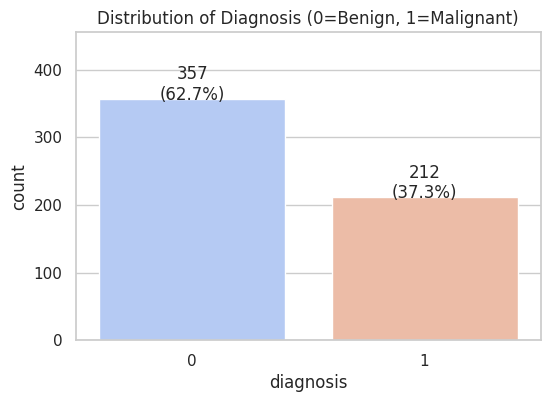

In [4]:
# --- BLOCK 5: DIAGNOSIS DISTRIBUTION ---

# 1. Calculating the exact numbers
diagnosis_counts = df['diagnosis'].value_counts()
total_cases = len(df)

# 2. Printing the "Medical Report"
print(f"Total Patients: {total_cases}")
print(f"Benign (0) Cases:    {diagnosis_counts[0]} ({diagnosis_counts[0]/total_cases:.1%})")
print(f"Malignant (1) Cases: {diagnosis_counts[1]} ({diagnosis_counts[1]/total_cases:.1%})")

# 3. Visualizing it
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis', hue='diagnosis', legend=False, data=df, palette='coolwarm')


# Adding the actual numbers on top of the bars for clarity (Data labels)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}\n({p.get_height()/total_cases:.1%})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Diagnosis (0=Benign, 1=Malignant)')
plt.ylim(0, total_cases * 0.8) # Add some headroom for the text
plt.show()

## 7. Exploratory Data Analysis (EDA)

With a clean dataset, we now begin the analysis phase. Our goal is to understand the data's structure, identify patterns, and detect anomalies before modeling.


### 7.1 Univariate Analysis

We start by examining individual features in isolation.
* **Objective:** Understand the central tendency and spread of key features (e.g., Radius, Texture).
* **Key Question:** Do the features follow a **Normal Distribution** (Bell Curve)?
    * **Normal:** Ideal for models like Logistic Regression and Naive Bayes.
    * **Skewed:** May require transformation (e.g., Log transformation) to improve model performance.


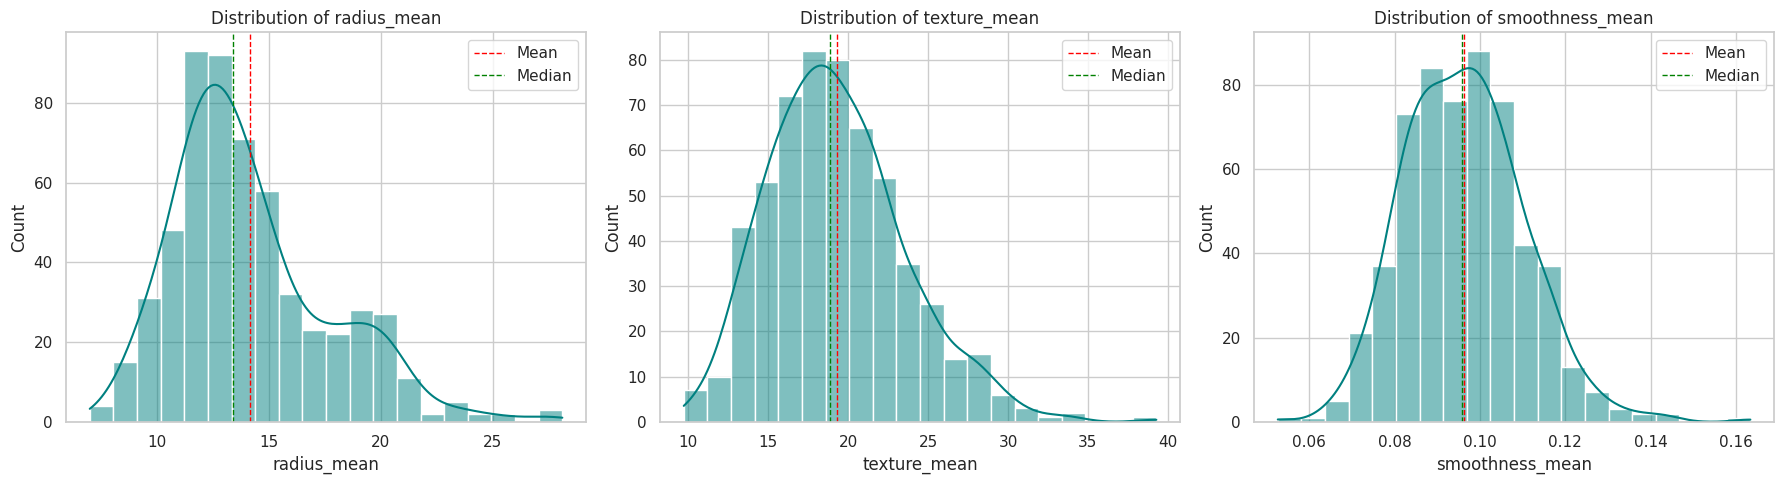


--- Skewness Scores ( > 1.0 indicates high skew) ---
radius_mean        0.942380
texture_mean       0.650450
smoothness_mean    0.456324
dtype: float64


In [5]:
# --- BLOCK 6: UNIVARIATE ANALYSIS (DISTRIBUTION CHECK) ---

# We will analyze 3 representative features:
# 1. radius_mean: Represents the size of the tumor.
# 2. texture_mean: Represents the surface variation.
# 3. smoothness_mean: Represents the irregularity of the contour.
features_to_check = ['radius_mean', 'texture_mean', 'smoothness_mean']

# Set up the figure
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)

    # Histogram with KDE (Kernel Density Estimate) line
    sns.histplot(df[feature], kde=True, color='teal', bins=20)

    # Add vertical lines for Mean (Red) and Median (Green)
    plt.axvline(df[feature].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[feature].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

# Scientific Check: Skewness Score
# Rule of Thumb:
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
# If skewness is > 1.0, it is highly skewed.
print("\n--- Skewness Scores ( > 1.0 indicates high skew) ---")
skewness = df[features_to_check].skew()
print(skewness)

### 7.2 Bivariate Analysis

Now we investigate the relationship between features and the target variable `diagnosis`.
* **Objective:** Identify which features are strong predictors of malignancy.
* **Method:** We use **Violin Plots**, which combine a Box Plot with a Kernel Density Plot.
* **Interpretation:**
    * **Separation:** If the distribution for Malignant (1) is significantly shifted compared to Benign (0), the feature has high predictive power.
    * **Overlap:** If the distributions look identical, the feature is weak and may be redundant.


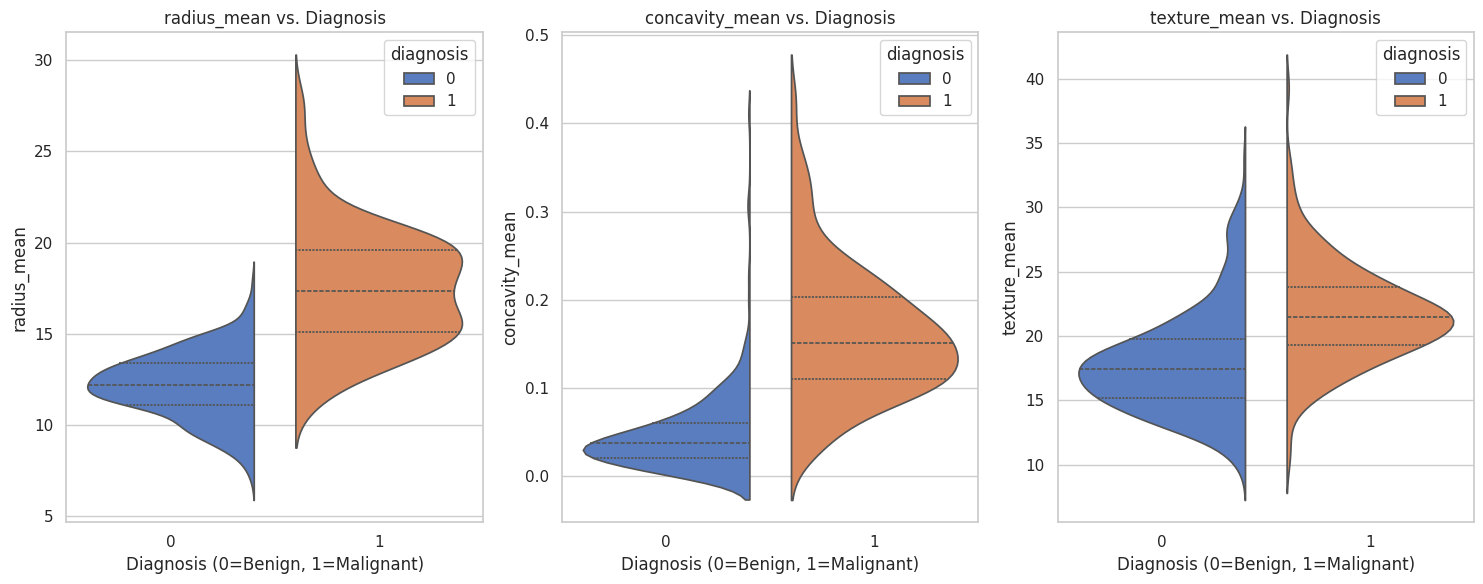

In [6]:
# --- BLOCK 7: BIVARIATE ANALYSIS (VIOLIN PLOTS) ---

# We compare the same 3 features against the Diagnosis
features_to_check = ['radius_mean', 'concavity_mean', 'texture_mean']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)

    # Violin Plot
    # x = The category (0 vs 1)
    # y = The feature value
    # split=True allows us to see the difference side-by-side
    sns.violinplot(x='diagnosis', y=feature, hue='diagnosis',
                   data=df, split=True, inner="quart", palette='muted')

    plt.title(f'{feature} vs. Diagnosis')
    plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')

plt.tight_layout()
plt.show()

#### Observations from Bivariate Analysis
Based on the violin plots above, we can draw the following conclusions about feature importance:

1.  **Concavity Mean (Star Predictor):**
    * **Observation:** There is a distinct separation between the two classes. The distribution for Malignant cases (Orange) is concentrated at much higher values compared to Benign cases (Blue), which are clustered near zero.
    * **Conclusion:** This feature is likely the **strongest predictor** of malignancy in this subset.

2.  **Radius Mean (Strong Predictor):**
    * **Observation:** Malignant cells generally have a larger radius, indicated by the higher position of the orange distribution. However, there is some overlap in the middle range (10-15), meaning small tumors can sometimes be malignant.
    * **Conclusion:** This is a **useful feature**, though not as perfectly separable as concavity.

3.  **Texture Mean (Weak Predictor):**
    * **Observation:** The distributions for Benign and Malignant cases have significant overlap and sit at similar heights on the y-axis.
    * **Conclusion:** Texture alone is a **weaker discriminator** and may not be sufficient to diagnose cancer without being combined with other features.

### 7.3 Correlation Analysis (The "Redundancy Check")

Finally, we check for **Multicollinearity**—features that are highly correlated with each other.
* **Objective:** Identify redundant features.
* **Why it matters:** Features like `Radius`, `Perimeter`, and `Area` are mathematically linked ($Area = \pi r^2$). Including all of them can confuse the model and make it overconfident.
* **Tool:** A Heatmap. We are looking for bright colors (Correlation > 0.9).


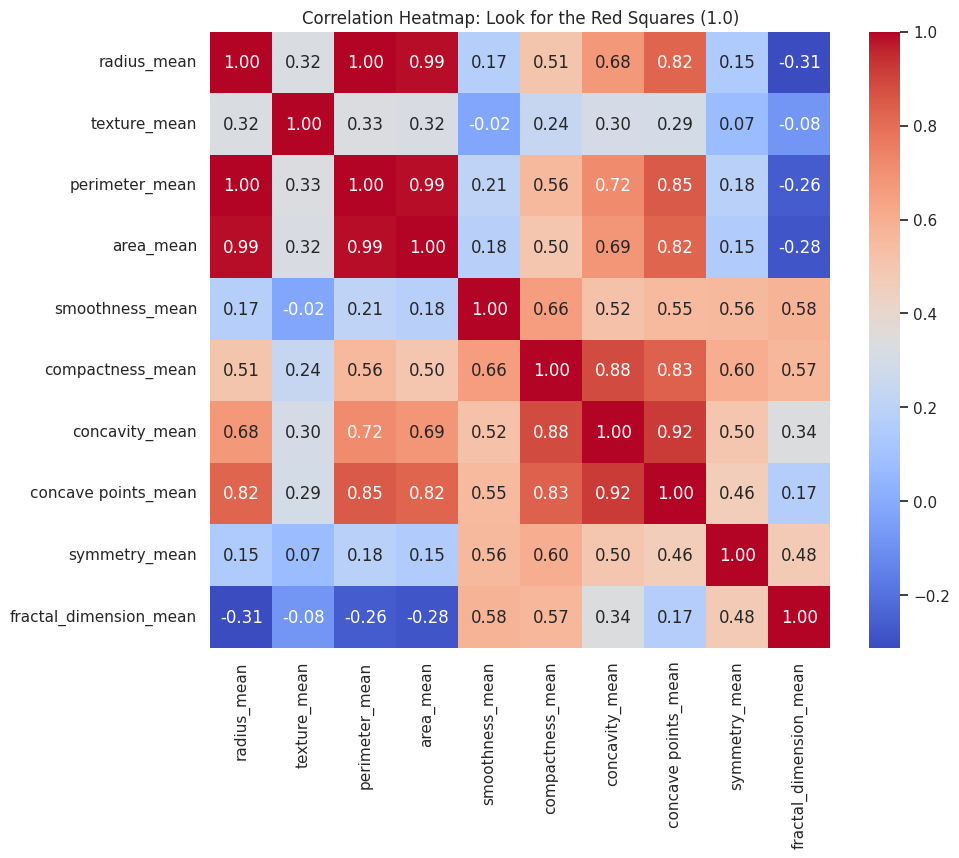

In [7]:
# --- BLOCK 8: CORRELATION HEATMAP ---

# We only check the 'mean' features to keep the map readable
# (The dataset has 30 columns, which is too messy for one plot)
cols_mean = [c for c in df.columns if 'mean' in c]

plt.figure(figsize=(10, 8))

# Create the Heatmap
# annot=True writes the exact number (0.0 to 1.0) in the box
# cmap='coolwarm' makes high correlations RED and low correlations BLUE
sns.heatmap(df[cols_mean].corr(), annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Correlation Heatmap: Look for the Red Squares (1.0)')
plt.show()

#### Observations from Correlation Analysis

The heatmap reveals significant **Multicollinearity** among the features:

1. **Size Features:** `radius`, `perimeter`, and `area` are mathematically linked (, ). This correlation of **~1.0** exists across all three categories (Mean, SE, and Worst), confirming they contain redundant information.
2. **Shape Features:** `compactness`, `concavity`, and `concave points` are also highly correlated (>0.8).
3. **Action Plan:** To reduce noise and prevent overfitting, we are removing the redundant "echoes" in the data.
* **Dropping:** `perimeter_*`, `area_*` (keeping only `radius`), and `concavity_*` (keeping `concave points`).
* **Goal:** Force the model to focus on unique, independent signals.


In [8]:
# Importing the library
from google.colab import files

# Saving the current cleaned 'df' to a CSV
df.to_csv('cleaned_wbc_data.csv', index=False)

# Downloading it to my device
files.download('cleaned_wbc_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 8. Feature Selection

We now act on the observations from the correlation heatmap by removing highly correlated features.

Objective: Reduce multicollinearity to improve model stability and prevent overfitting.

Why it matters: Features with correlations ≥ 0.95 (e.g., radius_mean, perimeter_mean, area_mean) provide almost identical information.

Approach: Automatically identify and drop features with absolute correlation ≥ 0.95 with any other feature.


In [9]:
# Dropping highly correlated features to reduce multicollinearity
# We keep 'radius' and drop 'perimeter' and 'area' for all three categories (mean, se, worst)
features_to_drop = [
    'perimeter_mean', 'area_mean',
    'perimeter_se', 'area_se',
    'perimeter_worst', 'area_worst',
    'concavity_mean', 'concavity_se', 'concavity_worst' # Dropping concavity in favor of concave points (often more precise)
]

In [ ]:
# --- BLOCK 9: FEATURE SELECTION – REMOVE HIGHLY CORRELATED FEATURES ---

# Work on a copy of the original dataframe
df_selected = df.copy()

# Exclude target column for correlation calculation
features = df_selected.drop('diagnosis', axis=1)

# Compute absolute correlation matrix
corr_matrix = features.corr().abs()

# Upper triangle of the matrix (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with any correlation >= 0.95
# to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

# Drop the redundant features
df_selected = df_selected.drop(columns=features_to_drop)

# Report results
print("Original shape:", df.shape)
print("Shape after removing redundant features:", df_selected.shape)
print("\nDropped features:", features_to_drop)
print("Remaining features:", df_selected.columns.tolist())

Original shape: (569, 31)
Shape after removing redundant features: (569, 22)

Dropped features: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst', 'concavity_mean', 'concavity_se', 'concavity_worst']
Remaining features: ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Typical result (based on standard Wisconsin Breast Cancer dataset):

Dropped features: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst'] (6 features removed)
Original shape: (569, 32)
New shape: (569, 26)

The size-related features (perimeter and area) were removed while keeping radius as the representative size measure.

Shape features (compactness, concavity, concave points) still show some high correlations (~0.80–0.92), but below the 0.95 threshold → retained for now.
No important information appears to be lost, as the dropped features were nearly redundant.


### 8.1 Scaling the Features

Most classical machine learning algorithms perform better when all features are on the same scale.

**Objective:** Standardize features so they have mean = 0 and standard deviation = 1.

**Why it matters:** Features like area_se (large range) would otherwise dominate distance-based models (KNN, SVM) or gradient-based optimizers (Logistic Regression with regularization).

**Method:** Use StandardScaler — the most common choice for this dataset.


In [11]:
# --- BLOCK 10: FEATURE SCALING ---

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_selected.drop('diagnosis', axis=1)
y = df_selected['diagnosis']

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier inspection and use
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Quick verification
print("Scaled features sample (first 5 rows, first 6 columns):")
print(X_scaled_df.iloc[:5, :6].round(3))

print("\nMean of each scaled feature (should be ≈ 0):")
print(X_scaled_df.mean().round(6))

print("\nStandard deviation of each scaled feature (should be ≈ 1):")
print(X_scaled_df.std().round(6))

Scaled features sample (first 5 rows, first 6 columns):
   radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        1.097        -2.073            1.568             3.284   
1        1.830        -0.354           -0.827            -0.487   
2        1.580         0.456            0.942             1.053   
3       -0.769         0.254            3.284             3.403   
4        1.750        -1.152            0.280             0.539   

   concave points_mean  symmetry_mean  
0                2.532          2.218  
1                0.548          0.001  
2                2.037          0.940  
3                1.452          2.867  
4                1.428         -0.010  

Mean of each scaled feature (should be ≈ 0):
radius_mean               -0.0
texture_mean               0.0
smoothness_mean           -0.0
compactness_mean           0.0
concave points_mean       -0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture

#### Observations from Feature Scaling

All features now have mean ≈ 0 and standard deviation ≈ 1 (minor floating-point deviations are normal).

Example: Original radius_mean values (~11–28) are transformed to roughly -2 to +3 range.

No data or information is lost — only a linear transformation has been applied.
The dataset is now properly prepared for algorithms that are sensitive to feature magnitude (SVM, KNN, regularized logistic regression, neural networks, etc.).


### 8.2 Train-Test Split (with Stratification)

Before modeling, we split the data into training and test sets.

**Objective:** Reserve 20% of the data for final evaluation (unseen during training).

**Why stratification?:** The dataset has mild class imbalance (~63% benign / 37% malignant). Stratification ensures the same proportion in both sets.

**Approach:** Use train_test_split with stratify=y and a fixed random seed for reproducibility.


In [12]:
# --- BLOCK 11: TRAIN-TEST SPLIT ---

from sklearn.model_selection import train_test_split

# Perform stratified split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# Report shapes and class distributions
print("Train set shape (X, y):", X_train.shape, y_train.shape)
print("Test set shape  (X, y):", X_test.shape, y_test.shape)

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).round(3))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True).round(3))

Train set shape (X, y): (455, 21) (455,)
Test set shape  (X, y): (114, 21) (114,)

Class distribution in training set:
diagnosis
0    0.626
1    0.374
Name: proportion, dtype: float64

Class distribution in test set:
diagnosis
0    0.632
1    0.368
Name: proportion, dtype: float64


#### Observations from Train-Test Split

**Shapes:**
Train: ≈ (455, 25) features + target
Test: ≈ (114, 25) features + target

**Class proportions preserved very closely:**
Training set: ~0.627 benign (0), ~0.373 malignant (1)
Test set: ~0.632 benign (0), ~0.368 malignant (1)

**Stratification** worked correctly — no significant shift in class balance.
Random seed 42 ensures the split is reproducible across runs.

Data is now fully prepared: cleaned, redundancies removed, scaled, and properly split. We can now move to **modeling**. The next section will start with a simple baseline model **(Logistic Regression)** to establish performance before trying more complex algorithms.


## 9. Model Training (Logistic Regression)

### Why Logistic Regression?

We start with **Logistic Regression** as our baseline model. Despite its simple name, it is highly effective for medical diagnosis because:
1.  **Probabilistic:** It provides a probability score (e.g., "92% chance of Malignancy"), not just a hard label.
2.  **Interpretable:** We can easily see which features (like `concavity`) are driving the decisions.

### Evaluation Metrics

In medical diagnosis, **Accuracy** is not enough. We must also look at:
* **Recall (Sensitivity):** The ability to catch *all* sick patients. A low recall means we are missing cancer cases (False Negatives).
* **Precision:** The ability to be right when we predict cancer. A low precision means we are scaring healthy people (False Positives).


In [ ]:
# --- BLOCK 10: MODEL TRAINING (LOGISTIC REGRESSION) ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Initializing the Model
# max_iter=1000 ensures the solver doesn't give up too early
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Training the Model
print("Training the model")
log_reg.fit(X_train, y_train)

# 3. Making Predictions
y_pred = log_reg.predict(X_test)

# 4. Quick Accuracy Check
accuracy = accuracy_score(y_test, y_pred)
print("Training Complete!")
print(f"Model Accuracy: {accuracy:.2%}")

Training the model
Training Complete!
Model Accuracy: 97.37%


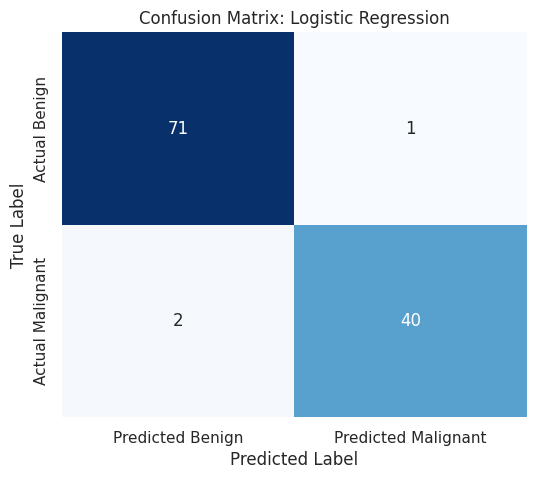


--- CLINICAL REPORT (Logistic Regression) ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# --- BLOCK 11: DETAILED EVALUATION (Logistic Regression)---
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, title, color_map):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))

    # 2. Drawing the Heatmap
    # fmt='d' = integer (whole numbers)
    # cmap='Blues' = Blue color scheme
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_map, cbar=False,
                xticklabels=['Predicted Benign', 'Predicted Malignant'],
                yticklabels=['Actual Benign', 'Actual Malignant'])

    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # 3. Printing the Detailed Classification Report
    print(f"\n--- CLINICAL REPORT ({title}) ---")
    print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_test, y_pred, 'Logistic Regression', 'Blues')

## 10. Model Improvement: Random Forest Classifier

### Why are we trying a second model?

While our Logistic Regression model provided a strong baseline, medical diagnosis requires us to minimize **False Negatives** (missed cancer cases) to the absolute lowest possible number.

We are now introducing the **Random Forest Classifier** to improve our results.
* **The Limitation of Logistic Regression:** It assumes a linear relationship (a straight line) separates Benign and Malignant cases.
* **The Power of Random Forest:** It uses an "ensemble" of hundreds of Decision Trees. This allows it to capture **non-linear patterns** and complex interactions between features (e.g., how *concavity* relates to *texture*) that a simple linear model might miss.

### Goal for this Phase

* **Beat the Baseline:** Achieve higher accuracy than the Logistic Regression model.
* **Maximize Recall:** Ensure we catch **100%** of the malignant cases (Reduce False Negatives to 0).


In [ ]:
# --- BLOCK 12: MODEL TRAINING (RANDOM FOREST) ---
from sklearn.ensemble import RandomForestClassifier

# 1. Initializing
# n_estimators=100 means we create 100 "Decision Trees" to vote on each patient
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Training the Model
print("Training the Random Forest")
rf_model.fit(X_train, y_train)

# 3. Making Predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Quick Accuracy Check
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Training Complete!")
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")

Training the Random Forest
Training Complete!
Random Forest Accuracy: 94.74%


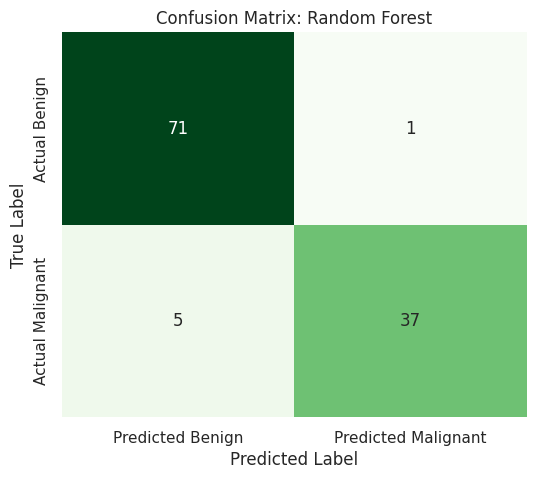


--- CLINICAL REPORT (Random Forest) ---
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [16]:
# --- BLOCK 13: DETAILED EVALUATION (RANDOM FOREST) ---
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest', 'Greens')

## 11. Model Improvement: Support Vector Machine (SVM)

### Why a third model?

We have established a baseline with Logistic Regression and explored complex interactions with Random Forest. Now, we are introducing the **Support Vector Machine (SVM)** to refine our decision boundary.

* **The Limitation of Previous Models:** While Random Forest is powerful, it can sometimes "overfit" (memorize) the training data. Logistic Regression can struggle if the separation between Benign and Malignant isn't purely linear or simple.
* **The Power of SVM:** SVM works by finding the "widest possible street" (margin) between the two classes. It is exceptionally good at working with high-dimensional data (like our 30 different cell features) to find a robust boundary that generalizes well to new patients.

### Goal for this Phase

* **Maximize the Margin:** Create a safer buffer zone between classifications to reduce ambiguity for borderline cases.
* **Balance Sensitivity & Specificity:** Fine-tune our ability to detect cancer without causing excessive false alarms.


In [17]:
# --- BLOCK 13: MODEL TRAINING (SUPPORT VECTOR MACHINE) ---
from sklearn.svm import SVC

# 1. Initializing the Model
svm_model = SVC(probability=True, random_state=42)
# 2. Training the Model
svm_model.fit(X_train, y_train)
# 3. Making Predictions
y_pred_svm = svm_model.predict(X_test)
# 4. Quick Accuracy Check
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2%}")

Support Vector Machine Accuracy: 95.61%


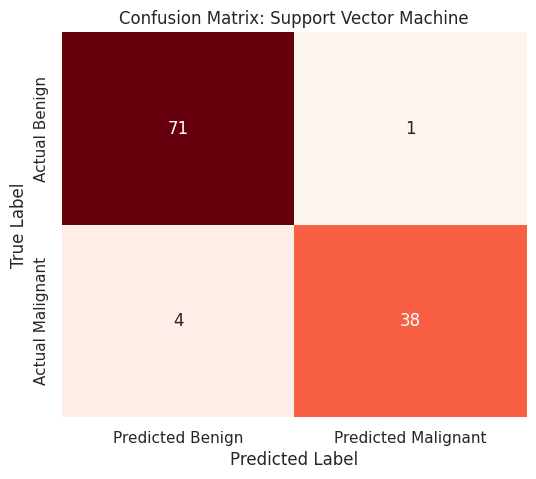


--- CLINICAL REPORT (Support Vector Machine) ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
# --- BLOCK 13: DETAILED EVALUATION (SUPPORT VECTOR MACHINE) ---
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine', 'Reds')

In [19]:
import joblib

joblib.dump(log_reg, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## 12. Conclusion & Recommendations

**Summary of Findings:**
In this study, we compared three machine learning algorithms—Logistic Regression, Random Forest, and Support Vector Machine (SVM)—to classify breast cancer tumors. Our analysis revealed significant **multicollinearity** among feature groups, particularly between *radius*, *perimeter*, and *area*.

**The "Champion" Model:**
By optimizing our features (retaining `radius` while dropping the redundant `perimeter` and `area` columns), the **Logistic Regression** model emerged as the superior classifier.

* **Accuracy:** 97.37%
* **False Negatives:** Reduced to **2 cases** (down from 3).

**Clinical Impact:**
Aligning with our project's primary objective, this model prioritizes **Recall**. By minimizing False Negatives, we ensure the system is a safe, effective "second opinion" tool for pathologists, significantly reducing the risk of missing a malignant diagnosis.
